Accuracy: 0.55
Precision: 0.625
Recall: 0.7692307692307693


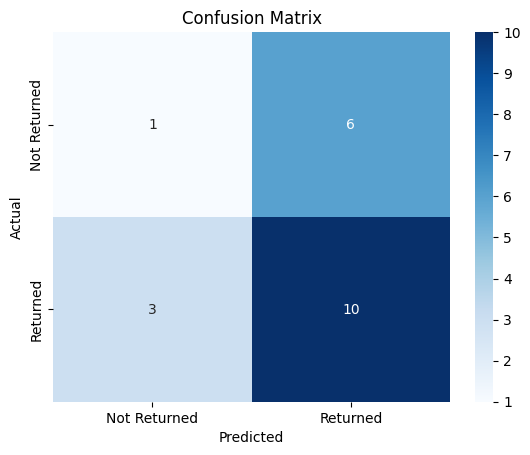

In [8]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("/content/product_return.csv")

# Step 2: Clean column names (just in case)
data.columns = data.columns.str.strip()

# Step 3: Encode categorical values (if any)
# This will convert text columns into numeric format

# Assuming 'returned' is the target and shouldn't be one-hot encoded
categorical_cols = [col for col in data.columns if col != 'returned' and data[col].dtype == 'object']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 4: Split data into features (X) and target (y)
X = data.drop("returned", axis=1)
y = data["returned"]

# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 7: Make predictions
predictions = model.predict(X_test)

# Step 8: Evaluation metrics
accuracy = accuracy_score(y_test, predictions)
# Set pos_label to 'yes' since it represents the positive class in your data
precision = precision_score(y_test, predictions, pos_label='yes')
recall = recall_score(y_test, predictions, pos_label='yes')
conf_matrix = confusion_matrix(y_test, predictions)

# Step 9: Show results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Step 10: Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Not Returned", "Returned"],
            yticklabels=["Not Returned", "Returned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()